## **Homework 1** Problem 2

In [ ]:
%matplotlib inline

In [2]:
!nvidia-smi

Thu Oct 14 10:27:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.11       Driver Version: 471.11       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:07:00.0  On |                  N/A |
| 60%   39C    P8     9W / 100W |    617MiB /  4096MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from Canvas and put into your Google Drive.
Mount your Google Drive to this notebook.

In [18]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Load MNIST dataset from your Google Drive. 

In [19]:
from scipy.io import loadmat
# mnist = loadmat('/content/gdrive/My Drive/CV2HW/mnist.mat')
mnist = loadmat('mnist.mat')

traindata = mnist['traindata'][:50000]
trainlabels = mnist['trainlabels'].ravel()[:50000]
validdata = mnist['traindata'][50000:]
validlabels = mnist['trainlabels'].ravel()[50000:]
testdata = mnist['testdata']
print(traindata.shape)
print(trainlabels.shape)
print(validdata.shape)
print(validlabels.shape)
print(testdata.shape)

x_train=traindata
y_train=trainlabels
x_test=validdata
y_test=validlabels
x_val=testdata

(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000, 784)


The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']`.

Visualize an image with label.

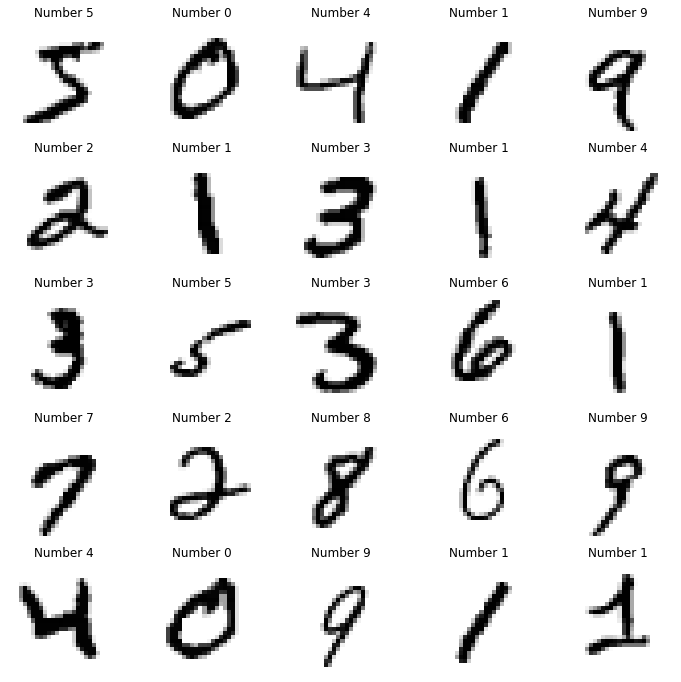

In [20]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(traindata[i].reshape((28, 28)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

### (b) PCA

Implement PCA on the whole MNIST dataset and reduce the data dimension from 784 to a smaller value. 

In [21]:
from sklearn.preprocessing import StandardScaler
#todo standardscalar


x_train = mnist['traindata'][:50000]
y_train = mnist['trainlabels'][:50000]
x_test = mnist['traindata'][50000:]
y_test = mnist['trainlabels'][50000:]
testdata = mnist['testdata']

from sklearn.decomposition import PCA

scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
# y_train=scaler.transform(y_train)


pca=PCA(.8)
x_train = pca.fit_transform(x_train)
# y_train=pca.transform(y_train)
y_train
x_test=pca.transform(x_test)
# y_test=pca.transform(y_test)
x_train.shape


(50000, 148)

ValueError: x and y must have same first dimension, but have shapes (44,) and (148,)

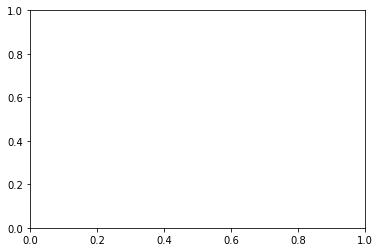

In [22]:
# plt.plot(range(44),pca.explained_variance_ratio_)
import numpy as np
plt.plot(range(44),np.cumsum(pca.explained_variance_ratio_))


**Please type your answers for the discussion questions here.**

## **Homework 1** Problem 3

### (a) $k$-Nearest Neighbor Classifier (Supervised Learning)

Implement the $k$-nearest neighbor classifier with Euclidean distance on the MNIST dataset.


In [23]:
from sklearn.neighbors import KNeighborsClassifier
def knn(traindata, trainlabels, testdata, k=1,n_jobs=-1):
  # TODO: implement k-NN
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(traindata,trainlabels)
  preds=model.predict(testdata)
  return preds

Evaluate the performance by classification accuracy on validation set with different number of training data.

In [24]:
import random
from sklearn.metrics import accuracy_score

n_entries = [1000, 2000, 5000, 10000, 20000, 50000]
raw_accuracies=[]
for n_sel in n_entries:
  print(n_sel)
  # randomly select training entries
  sel = random.sample(range(50000), n_sel)
  y_pred=knn(traindata[sel], trainlabels[sel].ravel(), validdata, 1)
  # TODO: run k-NN using raw training data
  acc_score=accuracy_score(validlabels,y_pred)
  raw_accuracies.append(acc_score)
raw_accuracies

1000
2000
5000
10000
20000
50000


[0.8925, 0.9135, 0.9383, 0.9506, 0.9615, 0.9712]

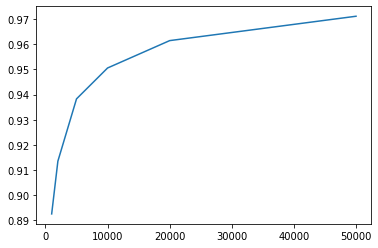

In [25]:
plt.plot(n_entries,raw_accuracies)

In [26]:
import random

n_entries = [1000, 2000, 5000, 10000, 20000, 50000]
pca_accuracies=[]
for n_sel in n_entries:
  # randomly select training entries
  sel = random.sample(range(50000), n_sel)
  y_pred=knn(x_train[sel], y_train[sel].ravel(), x_test, 1)

  # TODO: run k-NN using pca data
  
  # TODO: evaluate classification accuracy
  acc_score=accuracy_score(y_test,y_pred)
  pca_accuracies.append(acc_score)

pca_accuracies

[0.7062, 0.7042, 0.5969, 0.7423, 0.7287, 0.7479]

Draw the learning curve.

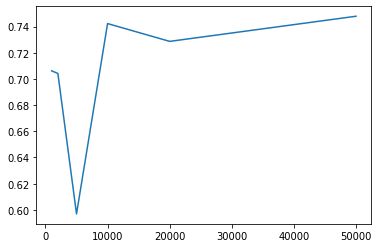

In [27]:
plt.plot(n_entries,pca_accuracies)


Evaluate the classification accuracy with different hyperparamter $k$.

In [32]:
import random

k_accuracies=dict()
k_list=range(1,100)
for k in k_list:
  print(k)
  y_pred=knn(x_train, y_train.ravel(), x_test, k)
  
  
  # TODO: evaluate classification accuracy
  acc_score=accuracy_score(y_test,y_pred)
  k_accuracies[k]=acc_score
max_k = max(k_accuracies, key=k_accuracies.get)
print("after hyperparameter tuning, best performance is given by k={}".format(max_k))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
after hyperparameter tuning, best performance is given by k=33


In [33]:
list(k_accuracies.values())


[0.7479,
 0.7331,
 0.7711,
 0.7833,
 0.8015,
 0.8038,
 0.811,
 0.8151,
 0.8192,
 0.8216,
 0.8241,
 0.8248,
 0.8251,
 0.8256,
 0.8268,
 0.8288,
 0.8305,
 0.8312,
 0.8309,
 0.8329,
 0.833,
 0.8319,
 0.8337,
 0.8328,
 0.8347,
 0.8335,
 0.8342,
 0.8329,
 0.8353,
 0.8354,
 0.8341,
 0.835,
 0.8369,
 0.836,
 0.8361,
 0.836,
 0.8356,
 0.8351,
 0.8342,
 0.8342,
 0.8345,
 0.8359,
 0.835,
 0.8361,
 0.8356,
 0.8358,
 0.8351,
 0.8344,
 0.8342,
 0.8332,
 0.8335,
 0.8344,
 0.8331,
 0.8328,
 0.8327,
 0.8338,
 0.8326,
 0.8339,
 0.8335,
 0.8334,
 0.8326,
 0.8318,
 0.833,
 0.8314,
 0.8322,
 0.8319,
 0.8324,
 0.8322,
 0.8324,
 0.8325,
 0.8315,
 0.832,
 0.8314,
 0.8324,
 0.8318,
 0.8319,
 0.8314,
 0.8323,
 0.8322,
 0.8319,
 0.8306,
 0.8308,
 0.8301,
 0.8302,
 0.8302,
 0.8315,
 0.8309,
 0.8311,
 0.8305,
 0.8311,
 0.8311,
 0.8307,
 0.8316,
 0.8303,
 0.8307,
 0.8299,
 0.8303,
 0.8304,
 0.83]

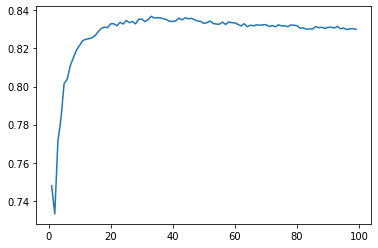

In [34]:

plt.plot(k_list,list(k_accuracies.values()))


**Please type your answers for the discussion questions here.**

### (b) $k$-means Clustering (Unsupervised Learning)

Implement $k$-Means clustering algorithm and report classification accuracies.

In [31]:
n_cluster = 10
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=3,n_init=10,max_iter=300,random_state=42)
# TODO: fit kmeans model
kmeans.fit(x_train)
# TODO: show real digit distribution in each cluster
print(kmeans.n_iter_)
kmeans.labels_[:5]
# TODO: evaluate accuracy


49


array([2, 1, 0, 2, 0])

Improve the clustering performance by using different $k$ and adding splitting and grouping strategies.

Infer $k$-Means results on the testing set. Evaluate performance.

**Please type your answers for the discussion questions here.**

### (c) Discussion

**Please type your answers for the discussion questions here.**